### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
#load the dataset
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Understanding

In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# droping extra columns according to data dictionary
extra_cols = ['instant', 'dteday', 'casual', 'registered']
df.drop(extra_cols, axis=1, inplace=True)

In [7]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


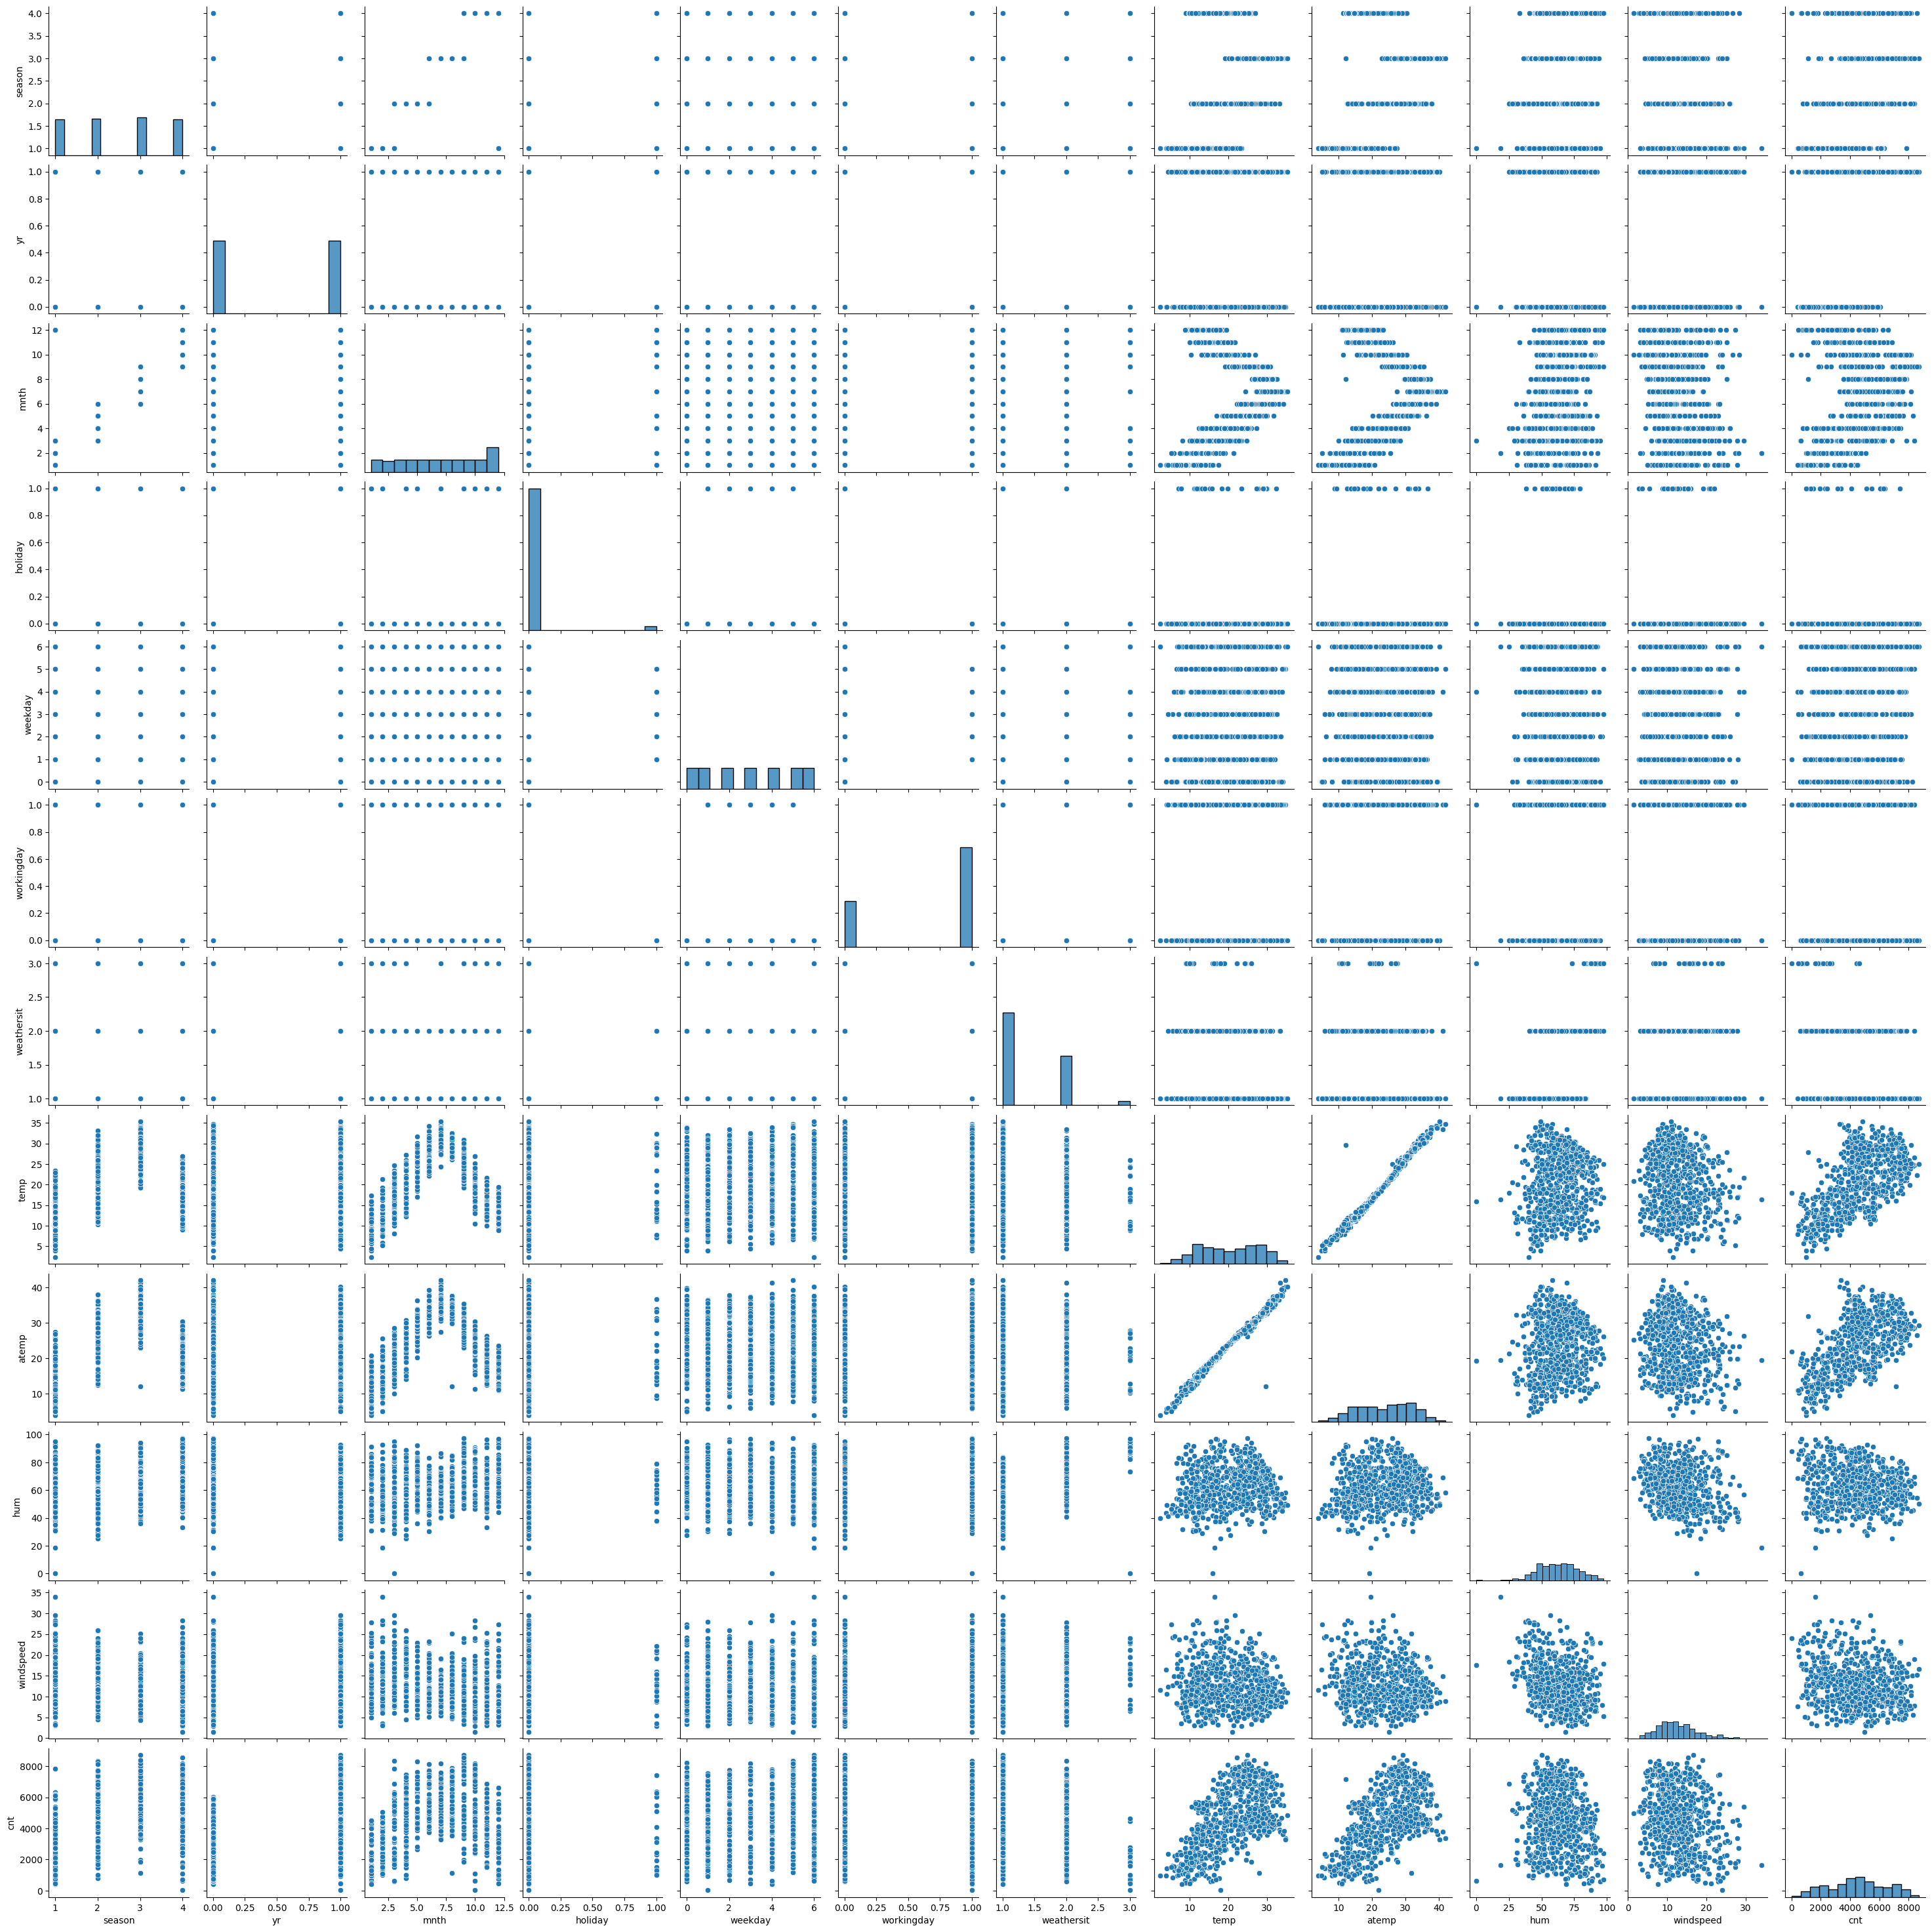

In [9]:
sns.pairplot(df)
plt.show()

## EDA

### Visualizing Categorical data

In [10]:
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

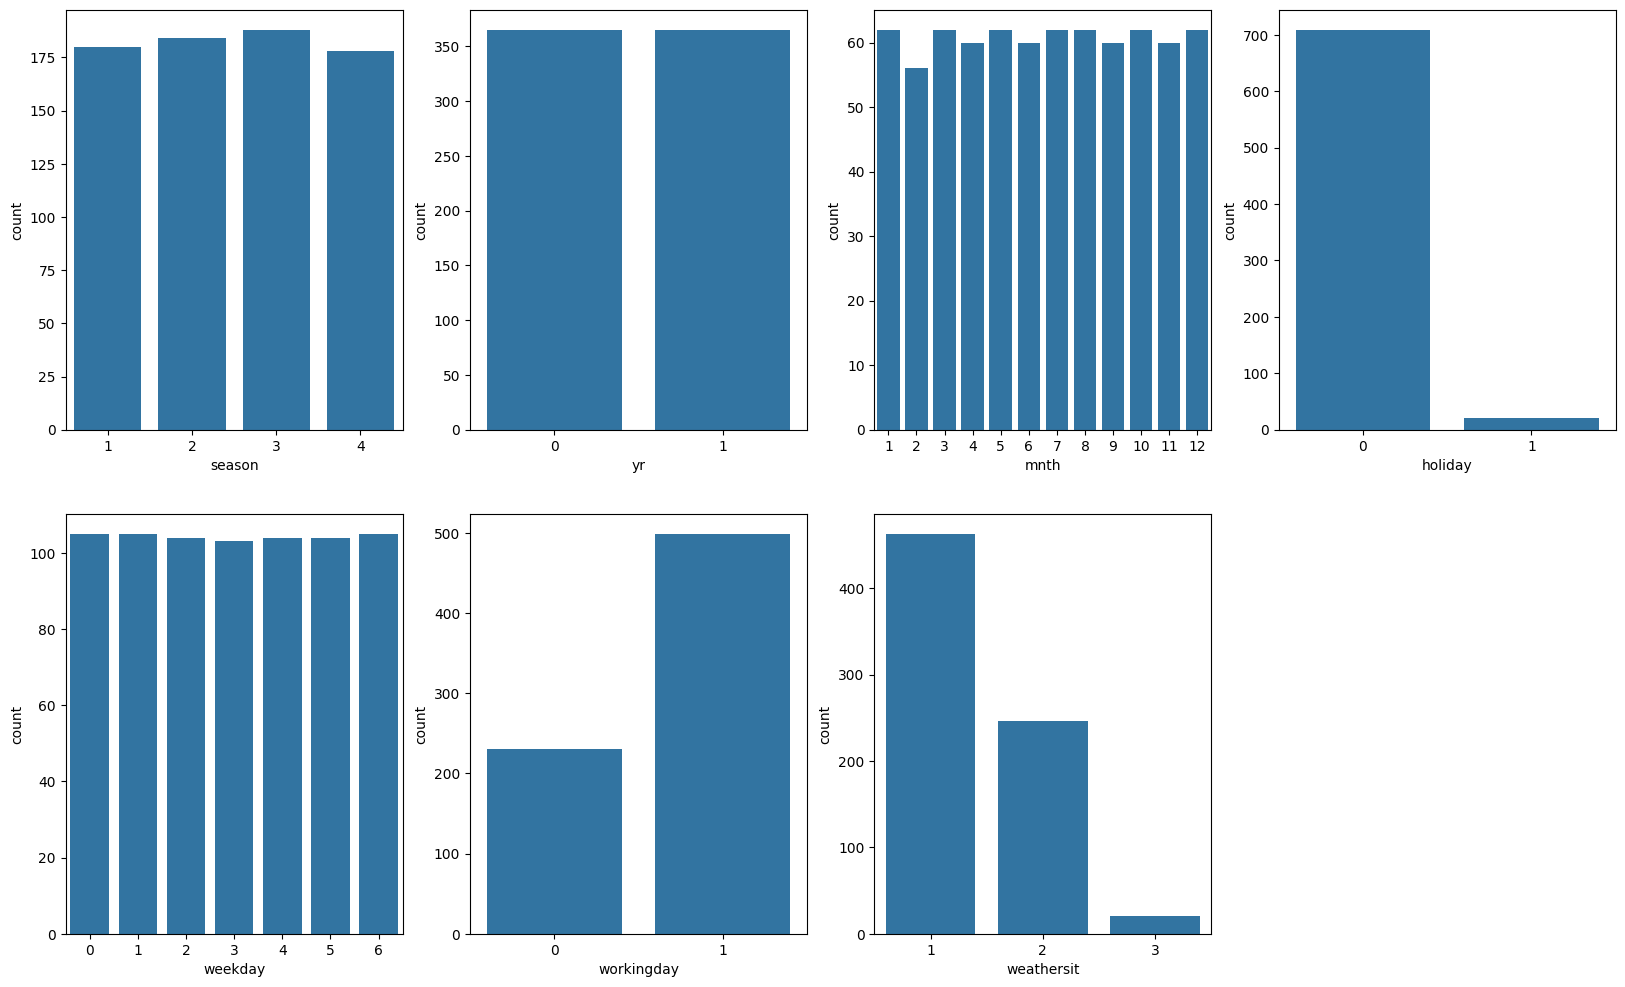

In [11]:
# Univariate categorical analysis
plt.figure(figsize=(20, 12))
i = 0
while i < len(cat_cols):
  plt.subplot(2,4,i+1)
  sns.countplot(x=cat_cols[i], data=df)
  i+=1
plt.show()

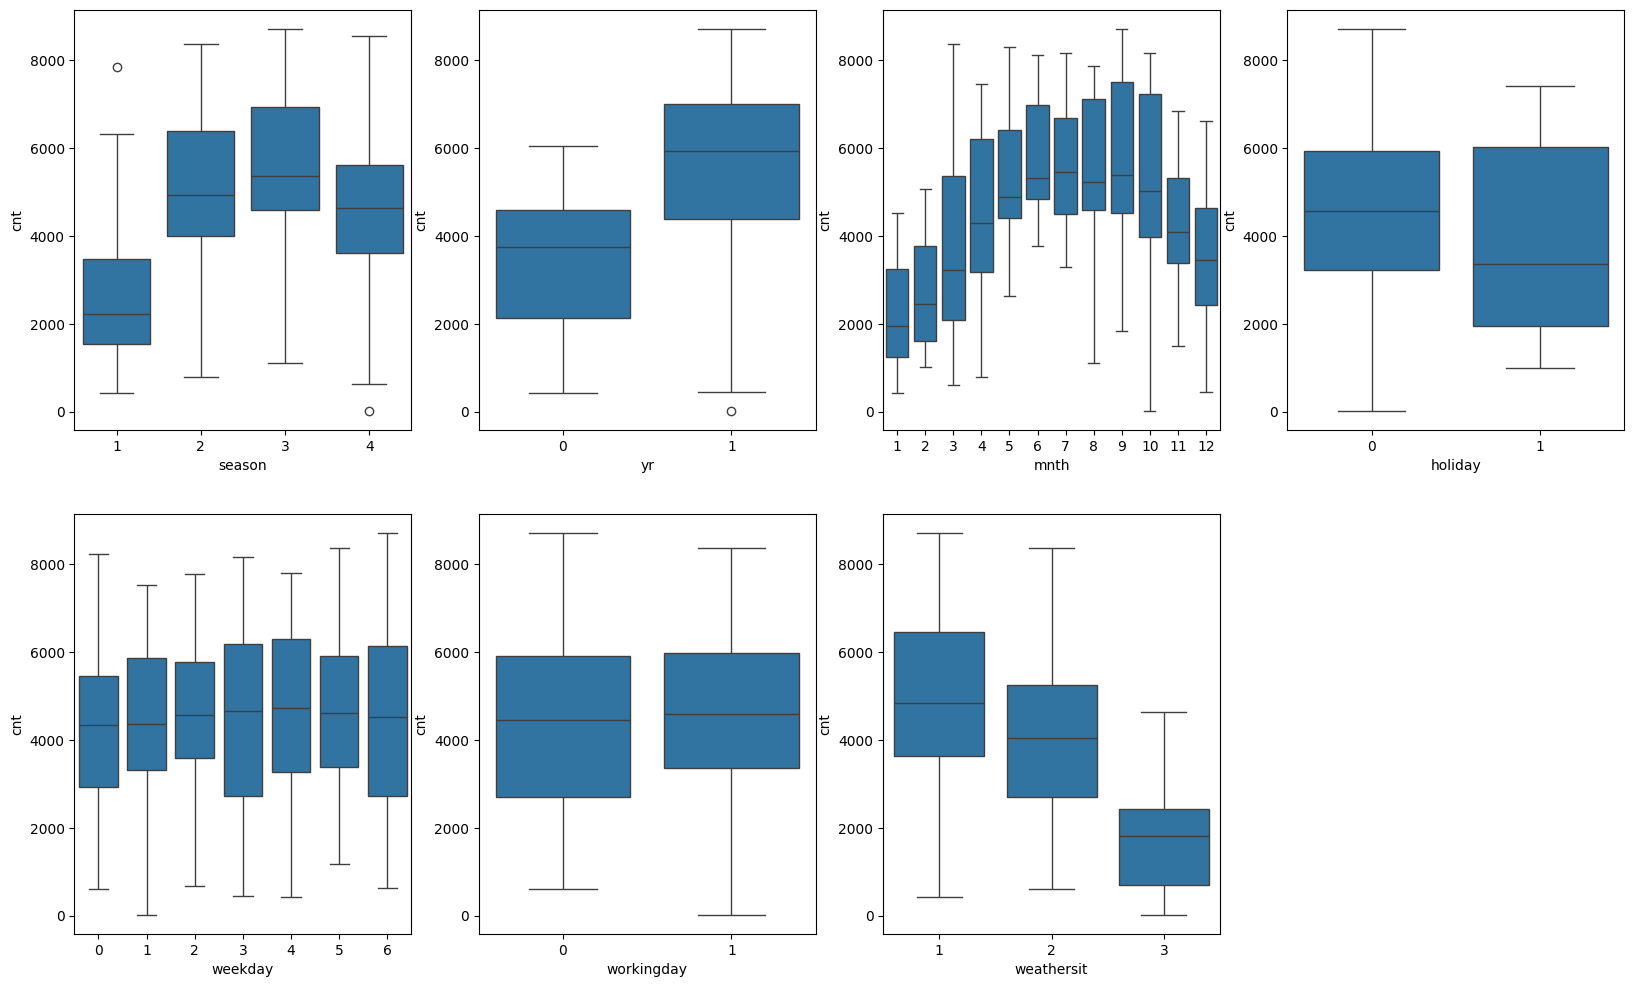

In [12]:
# Bivariate categorical analysis according to target variable
i = 0
plt.figure(figsize=(20, 12))
while i < len(cat_cols):
  plt.subplot(2,4,i+1)
  sns.boxplot(x = cat_cols[i], y = 'cnt', data = df)
  i += 1
plt.show()

### Visualizing Numerical data

In [13]:
num_cols = ['temp', 'atemp', 'hum', 'windspeed']

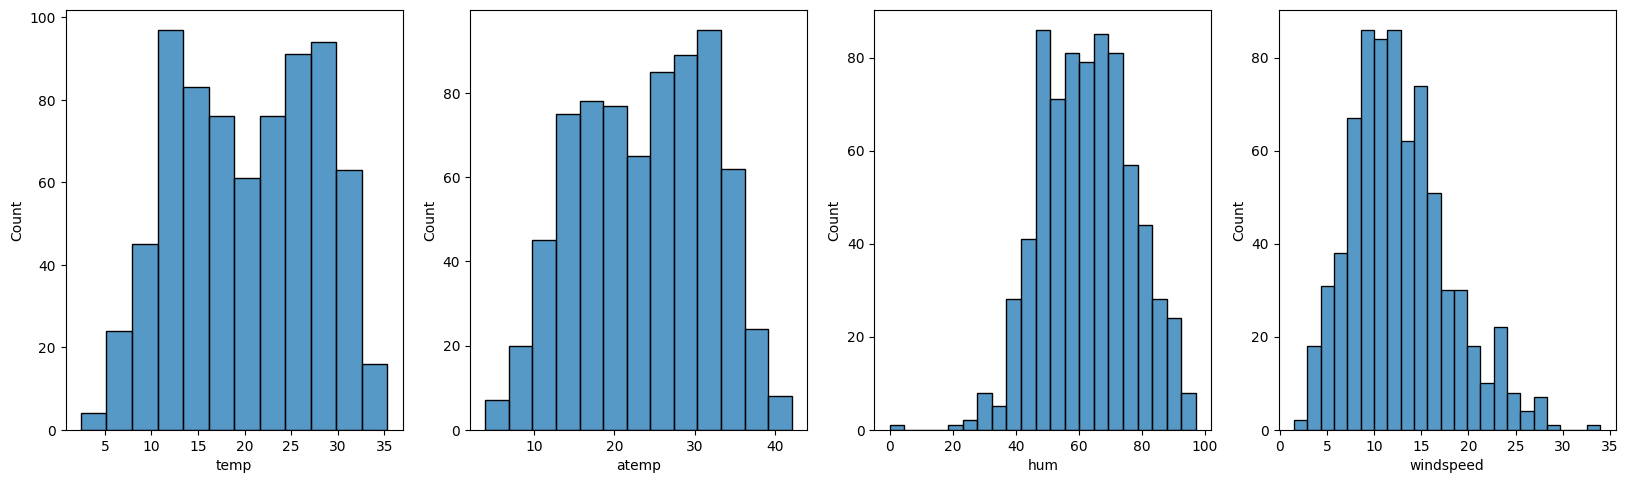

In [14]:
# Univariate numerical analysis
plt.figure(figsize=(20, 12))
i = 0
while i < len(num_cols):
  plt.subplot(2,4,i+1)
  sns.histplot(x=num_cols[i], data=df)
  i+=1
plt.show()

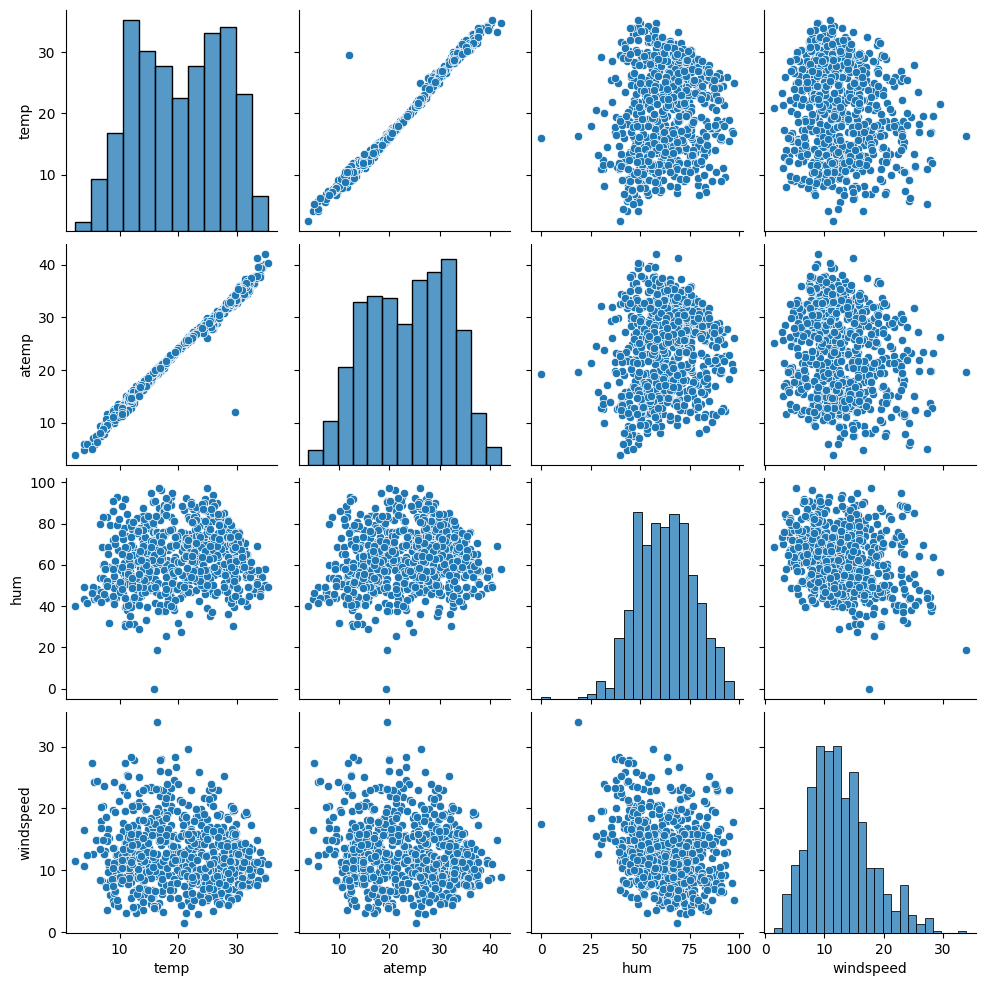

In [15]:
# Bivariate numerical analysis
sns.pairplot(df[num_cols])
plt.show()

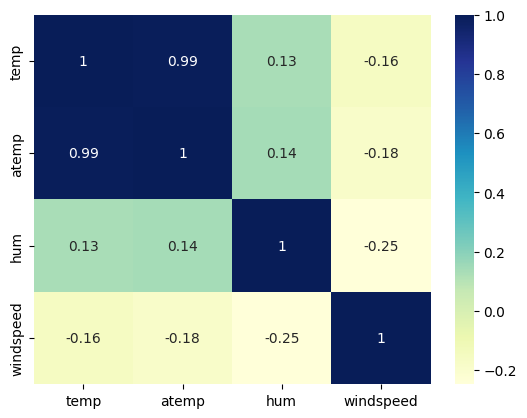

In [16]:
sns.heatmap(df[num_cols].corr(), annot=True, cmap = 'YlGnBu')
plt.show()

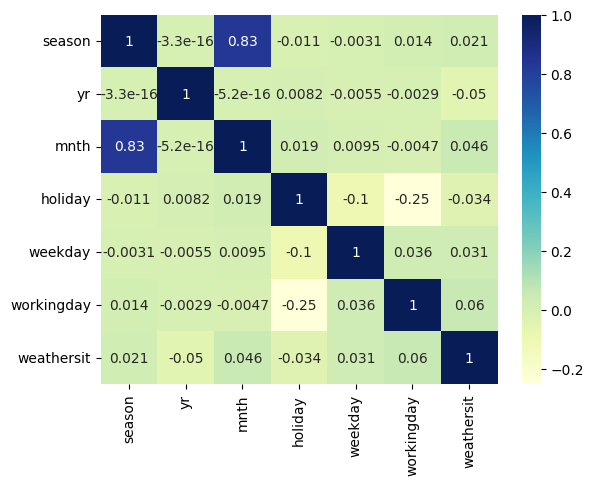

In [17]:
sns.heatmap(df[cat_cols].corr(), annot=True, cmap = 'YlGnBu')
plt.show()

## Data Preparation

In [18]:
cat_cols

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [19]:
df[cat_cols].nunique()

,0
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3


In [20]:
#mapping dictionary for features using data dictionary
season_mapping = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
mnth_mapping = {1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}
weekday_mapping = {0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}
weathersit_mapping = {1:'good',2:'moderate',3:'bad',4:'severe'}

In [21]:
df['season'] = df['season'].map(season_mapping)
df['mnth'] = df['mnth'].map(mnth_mapping)
df['weekday'] = df['weekday'].map(weekday_mapping)
df['weathersit'] = df['weathersit'].map(weathersit_mapping)

In [22]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
# making dummy variables for categorical features
s = pd.get_dummies(df['season'], dtype = int, drop_first=True)
m = pd.get_dummies(df['mnth'], dtype = int, drop_first=True)
week = pd.get_dummies(df['weekday'], dtype = int, drop_first=True)
w = pd.get_dummies(df['weathersit'], dtype = int, drop_first=True)

In [24]:
df = pd.concat([df, s, m, week, w], axis=1)

In [25]:
df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)

In [26]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


In [27]:
# dropping atemp because it has a very positive correlation with temprature
df.drop(['atemp'], axis = 1, inplace = True)

In [28]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,1,0


## Splitting the dataset

In [29]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=100)

In [30]:
df_train.shape

(511, 29)

In [31]:
df_test.shape

(219, 29)

## Rescaling data

In [32]:
scaler = MinMaxScaler()

In [33]:
num_cols

['temp', 'atemp', 'hum', 'windspeed']

In [34]:
num_cols.remove('atemp')
num_cols.append('cnt')
num_cols

['temp', 'hum', 'windspeed', 'cnt']

In [35]:
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [36]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [37]:
y_train = df_train.pop('cnt')
X_train = df_train

## Feature Selection

In [38]:
# Making an estimator for RFE
lr = LinearRegression()
lr.fit(X_train, y_train)

# Getting 15 relevant features
rfe = RFE(estimator = lr, n_features_to_select = 15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [39]:
rfe_list = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
rfe_list

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 6),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 10),
 ('sept', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', False, 7),
 ('thu', False, 11),
 ('tue', False, 9),
 ('wed', False, 12),
 ('good', True, 1),
 ('moderate', True, 1)]

In [40]:
selected_features = X_train.columns[rfe.support_]
selected_features

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'jan', 'jul', 'sept', 'sat', 'good', 'moderate'],
      dtype='object')

In [41]:
# taking account of only selected features
X = X_train[selected_features]

## Model Building

In [42]:
# Model - 1
X_train_sm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.50e-191
Time:                        16:16:54   Log-Likelihood:                 520.05
No. Observations:                 511   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -940.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0035      0.048      0.072      0.9

In [43]:
# checking its VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,25.64
3,temp,22.87
13,good,14.84
14,moderate,9.07
6,spring,5.69
2,workingday,5.43
5,windspeed,4.69
8,winter,4.14
7,summer,3.21
0,yr,2.10


In [44]:
# Drop 'hum' because it has a negative coeficient and high VIF
X = X.drop(['hum'], axis=1)

# Model - 2
X_train_sm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     190.0
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          6.18e-189
Time:                        16:16:55   Log-Likelihood:                 511.07
No. Observations:                 511   AIC:                            -992.1
Df Residuals:                     496   BIC:                            -928.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1189      0.039     -3.022      0.0

,Features,VIF
12,good,14.84
3,temp,13.98
13,moderate,8.47
2,workingday,5.36
4,windspeed,4.68
5,spring,4.48
6,summer,2.79
7,winter,2.76
0,yr,2.08
11,sat,1.99


In [45]:
# drop 'good' beacuse high VIF
X.drop(['good'], axis=1, inplace=True)

# Model - 3
X_train_sm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.4
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          9.40e-163
Time:                        16:16:55   Log-Likelihood:                 446.01
No. Observations:                 511   AIC:                            -864.0
Df Residuals:                     497   BIC:                            -804.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1640      0.036      4.590      0.0

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.63
5,spring,3.07
6,summer,2.34
0,yr,2.07
7,winter,1.97
11,sat,1.96
8,jan,1.62
9,jul,1.59


In [46]:
# drop 'holiday' high p-value
X.drop(['holiday'], axis=1, inplace=True)

# Model - 4
X_train_sm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     162.2
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.40e-163
Time:                        16:16:55   Log-Likelihood:                 444.77
No. Observations:                 511   AIC:                            -863.5
Df Residuals:                     498   BIC:                            -808.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1571      0.036      4.426      0.0

,Features,VIF
2,temp,6.82
1,workingday,4.67
3,windspeed,4.61
4,spring,2.99
5,summer,2.33
0,yr,2.07
6,winter,1.91
10,sat,1.83
7,jan,1.62
8,jul,1.59


In [47]:
# drop 'jan' high p-value and negative coefficient
X.drop(['jan'], axis=1, inplace=True)

# Model - 5
X_train_sm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     176.0
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          7.70e-164
Time:                        16:16:56   Log-Likelihood:                 443.25
No. Observations:                 511   AIC:                            -862.5
Df Residuals:                     499   BIC:                            -811.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1429      0.035      4.130      0.0

,Features,VIF
2,temp,6.73
1,workingday,4.64
3,windspeed,4.59
4,spring,2.38
5,summer,2.32
0,yr,2.07
6,winter,1.90
9,sat,1.82
7,jul,1.58
10,moderate,1.54


In [48]:
# drop 'spring' due to negative coefficient
X.drop(['spring'], axis=1, inplace=True)

# Model - 6
X_train_sm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())
X.drop(['windspeed'], axis=1, inplace=True)
X_train_sm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     191.0
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.17e-163
Time:                        16:16:56   Log-Likelihood:                 440.09
No. Observations:                 511   AIC:                            -858.2
Df Residuals:                     500   BIC:                            -811.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0741      0.021      3.533      0.0

,Features,VIF
2,temp,5.99
1,workingday,3.64
0,yr,1.99
3,summer,1.74
7,sat,1.55
5,jul,1.52
8,moderate,1.50
4,winter,1.44
6,sept,1.27


In [49]:
# drop 'jul' high p-value
X.drop(['jul'], axis=1, inplace=True)

# Model - 7
X_train_sm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     213.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.94e-156
Time:                        16:16:56   Log-Likelihood:                 417.09
No. Observations:                 511   AIC:                            -816.2
Df Residuals:                     502   BIC:                            -778.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.018      0.075      0.9

,Features,VIF
2,temp,4.51
1,workingday,3.60
0,yr,1.98
6,sat,1.54
3,summer,1.53
7,moderate,1.49
4,winter,1.36
5,sept,1.19


## Residual Analysis

In [50]:
y_train_pred = lm.predict(X_train_sm)

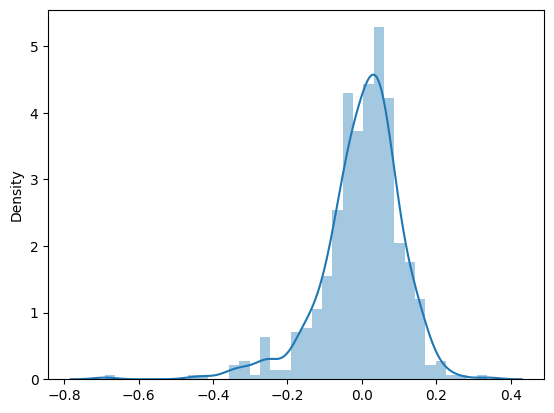

In [51]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

It is clearly seen that residuals are normally distributed and mean is at zero

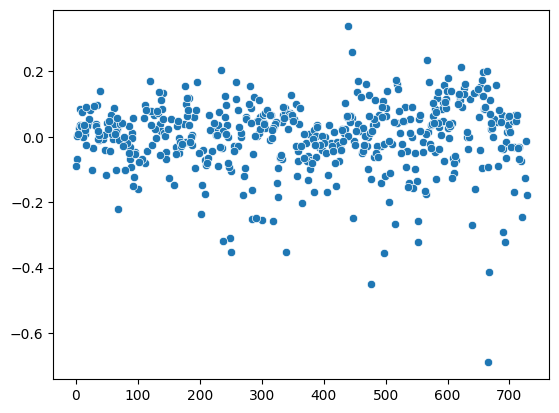

In [52]:
sns.scatterplot(res)
plt.show()

As from the above graph there is no relation between the error terms therefore homoscedasticity

## Evaluation

In [53]:
X_train_sm.columns

Index(['const', 'yr', 'workingday', 'temp', 'summer', 'winter', 'sept', 'sat',
       'moderate'],
      dtype='object')

In [54]:
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [55]:
y_test = df_test.pop('cnt')
X_test = df_test

In [56]:
X_test_sm = sm.add_constant(X_test)

In [57]:
X_test_sm = X_test_sm[X_train_sm.columns]

In [58]:
y_test_pred = lm.predict(X_test_sm)


In [59]:
# R squared
r2 = r2_score(y_test, y_test_pred)
r2

0.7676259296510015

In [60]:
# Adjusted R squared
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7334


Train set
- R^2: 0.77
- Adjusted R^2: 0.76

Test set
- R^2: 0.76
- Adjusted R^2: 0.73


In [63]:
lm.params

,0
const,0.001360
yr,0.238196
workingday,0.049445
temp,0.581514
summer,0.081793
winter,0.125478
sept,0.094233
sat,0.056165
moderate,-0.063712
